# Fundamentos de análisis financiero
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>OYM</code></p>
<style type="text/css">
    .formula {
        background: #f7f7f7;
        border-radius: 50px;
        padding: 15px;
    }
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>


## Análisis Financiero
Se refiere a una evaluación de la viabilidad, estabilidad y rentabilidad de un proyecto.

## Agenda
1. Fundamentos
1. Valor económico
1. Tasa de interés
1. Análisis temporal

In [1]:
# Importar módulos al cuaderno de Jupyter
import numpy_financial as npf
import pylab as pl


# Definir e incluir nuevas funciones al cuaderno de Jupyter
def incrementos(inicial: float, tasa: float, n: int) -> tuple:
    ''' Funcion que calcula los incrementos progresivos de un valor presente '''
    periodos = list(range(0, n+1))
    valores = []
    for periodo in periodos:
        valores.append(-npf.fv(pv=inicial, rate=tasa, nper=periodo, pmt=0))

    return periodos, valores


def millones(x: int, pos) -> str:
    """ Funcion que formatea los valores del un eje en moneda y en millones """
    return '${:1.1f}M'.format(x*1e-6)


## 1. Fundamentos
---
### 1.1 Interés
Interés, en economía y finanzas, es un índice utilizado para medir la rentabilidad de las inversiones.

### 1.2 Interés Simple
Es el interés o beneficio que se obtiene de una inversión cuando los intereses producidos durante cada periodo de tiempo que dura la inversión se deben únicamente al capital inicial, ya que los beneficios o intereses no se capitalizan en cada uno de los periodos.

\begin{equation*}
I_s = C \cdot t_i \cdot n  \\
\end{equation*}

>Donde:
> * $\color{#a78a4d}{I_s}$ = Interés simple
> * $\color{#a78a4d}{C}$ = Capital
> * $\color{#a78a4d}{t_i}$ = Tasa por periodo
> * $\color{#a78a4d}{n}$ = Número de periodos


### 1.3 Interés Compuesto
En el caso de la tasa de interés compuesta, los intereses obtenidos en cada período se suman al capital inicial para generar nuevos intereses, ya que los beneficios o intereses se capitalizan en cada uno de los periodos.

\begin{equation*}
I_c = C [ (1+t_i)^n-1 ]  \\
\end{equation*}

>Donde:
> * $\color{#a78a4d}{I_c}$ = Interés simple
> * $\color{#a78a4d}{C}$ = Capital
> * $\color{#a78a4d}{t_i}$ = Tasa por periodo
> * $\color{#a78a4d}{n}$ = Número de periodos

### <code>Ejemplo:</code> Interés
---
Si Alberto invierte US$ 1.000 dolares en JPMorgan y obtiene un rendimiento del 5% anual durante un período de tres años. 
* ¿Qué cantidad de intereses recibirá si retira cada año? 
* ¿Qué cantidad de intereses recibirá al final del tercer año?

In [2]:
# Ejemplo FV con python
inversion = 1_000
tasa = 1.5/100
periodos = 12

# Usando interés compuesto
simple = inversion*tasa*periodos

# Usando interés compuesto
compuesto = inversion*((1+tasa)**periodos-1)

# Salida estándar
print(f"-"*34)
print(f"| Tipo               | Interes   |")
print(f"-"*34)
print(f"| Simple por periodo | {inversion*tasa:9,.2f} |")
print(f"| Simple acumulado   | {simple:9,.2f} |")
print(f"| Compuesto          | {compuesto:9,.2f} |")
print(f"| Diferencia         | {compuesto-simple:9,.2f} |")
print(f"-"*34)

----------------------------------
| Tipo               | Interes   |
----------------------------------
| Simple por periodo |     15.00 |
| Simple acumulado   |    180.00 |
| Compuesto          |    195.62 |
| Diferencia         |     15.62 |
----------------------------------


## 2. Valor económico del dinero
---
El valor del dinero en el tiempo se infiere de una conjetura ampliamente aceptada que supone que hay un mayor beneficio en recibir una suma de dinero ahora que recibir una suma idéntica más tarde.

>Si definimos:
> * $\color{#a78a4d}{V_p}$ como valor actual o presente
> * $\color{#a78a4d}{V_f}$ como valor futuro (representa el valor del pago futuro)
> * $\color{#a78a4d}{t_i}$ como la tasa de Interes o descuento. (refleja nuestro costo de oportunidad)
> * $\color{#a78a4d}{n}$ como la cantidad de periodos (meses, años etc…) 

### 2.2 Valor presente de una suma futura
---
Puede definirse como el valor actual de una suma de dinero o flujos de efectivo futuros dada una tasa de rendimiento específica.

\begin{equation*}
V_p = \frac{V_f}{(1 + t_i)^n}  \\
\end{equation*}

### <code>Ejemplo:</code> Valor presente
---
Imagina que estas ahorrando para la Universidad y quieres que tu cuenta alcance un valor de $50.000.000 en 10 años. La cuenta gana 7,5% de interés al año. Para encontrar la inversión que tienes que hacer hoy para alcanzar esta suma, reemplaza las variables en la ecuación del valor actual.

In [3]:
# Ejemplo FV con python
valor_deseado = 50_000_000
tasa = 7.5/100
periodos = 10

# Usando la funcion pv de financial numpy
valor_a_invertir = npf.pv(fv=valor_deseado, rate=tasa, nper=periodos, pmt=0)
print(f"deberías invertir : {-valor_a_invertir:,.2f}")

deberías invertir : 24,259,696.42


### 2.2 Valor futuro de una suma presente
---
Permite proyectar cómo se modificará el valor del dinero que tenemos actualmente considerando las distintas alternativas de inversión que tenemos disponibles.

\begin{equation*}
V_f = V_p (1 + t_i)^n  \\
\end{equation*}

### <code>Ejemplo:</code> Valor futuro
---
Lina Maria quiere proyectar una inversión de 50 Millones en CaixaBank Smart que es un fondo de inversión de renta fija a 5 años con una tasa de interés de 4.8% sobre el capital invertido. 


In [5]:
# Ejemplo FV con python
valor_invertido = 50_000_000
tasa = 4.8/100
periodos = 5

# Usando la funcion fv de financial numpy
valor_a_recibir = npf.fv(pv=valor_invertido, rate=tasa, nper=periodos, pmt=0)
print(f"deberías recibir : {-valor_a_recibir:,.2f}")

deberías recibir : 63,208,635.84


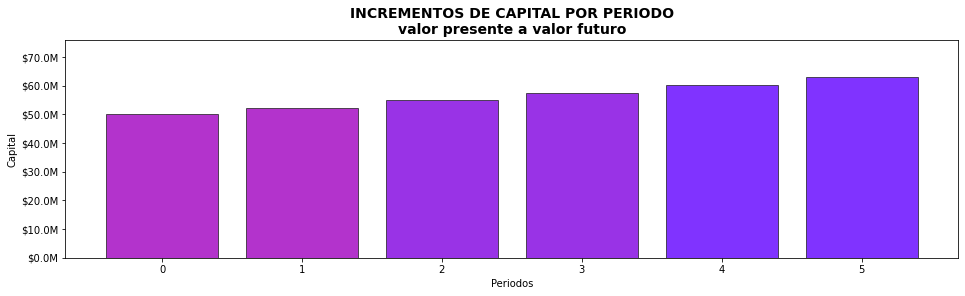

In [30]:
# Calcular los incrementos por periodo
names, values = incrementos(valor_invertido, tasa, periodos)

# Creación de la figura de MatplotLib
fig, ax = pl.subplots()
fig.set_size_inches(16, 4)
ax.yaxis.set_major_formatter(millones)

# agregamos datos
colores = list(map(lambda x: (1.5-round(x/max(values),1), 0.2, round(x/max(values),1)), values))
ax.bar(names, values, color=colores, edgecolor=(.1,.1,.1,.7))

pl.ylim(0, -valor_a_recibir * 1.2)
pl.xticks()

# Agregamos Texto
titulo = "Incrementos de capital por periodo\n".upper()
titulo = titulo + "valor presente a valor futuro"
pl.title(titulo, fontsize=14, fontweight="bold")
pl.xlabel("Periodos")
pl.ylabel("Capital")
pl.show()

## 1. Error absoluto
---
El error absoluto por definición la diferencia entre el valor que se considera real y el valor aproximado, siempre es positivo; cuando se realizan $\color{#a78a4d}{n}$ medidas de un mismo fenómeno se puede calcular como el promedio de los errores absolutos individuales o la raíz del error cuadrático medio.


\begin{align}
e_{a} & = \left| E \right| = \left| V_r-V_a \right| \\
EAM  & = \frac{1}{n}  \sum_{1}^n e_{a} =  \frac{1}{n} \sum_{1}^n \left| V_r-V_a \right| \\
RECM & =  \sqrt{ \frac{1}{n} \sum_{1}^n \left( V_r-V_a \right)^2 } \\
\end{align}


In [6]:
# Error Absoluto
ea_ga = abs(Et_ga)

# Media aritmética (Promedio - P)
P_ea = sum(ea_ga) / len(ea_ga)

# Desviación típica (Desviación - D)
D_ea = ((1/len(ea_ga)) * sum((P_ea - ea_ga)**2))**(1/2)

# Otros Promedios
EAM = sum(ea_ga) / len(ea_ga)
RECM = ((1/len(Et_ga)) * sum((Et_ga)**2))**(1/2)

# Salida estándar
print(f"-------------------------------------------------------------------------")
print(f"| No |  T [s]   |  To [s]    |   g[m/s²]  | ERROR REAL | ERROR ABSOLUTO |")
print(f"-------------------------------------------------------------------------")
print(f"| No | V Medido | V aparente | V aparente | Individual |   Individual   |")
print(f"-------------------------------------------------------------------------")
for N in range(len(Tr)):
    print(f"| {N+1:2} | {Ti[N]:8.3f} | {To[N]:10.3f} | {ga[N]:10.4f} | {Et_ga[N]:10.4f} | {ea_ga[N]:14.4f} |")

print(f"-------------------------------------------------------------------------")
print(f"| P  | {P_Ti:8.3f} | {P_To:10.3f} | {P_ga:10.4f} | {P_Et:10.4f} | {P_ea:14.4f} |")
print(f"-------------------------------------------------------------------------")
print(f"| D  | {D_Ti:8.3f} | {D_To:10.3f} | {D_ga:10.4f} | {D_Et:10.4f} | {D_ea:14.4f} |")
print(f"-------------------------------------------------------------------------")
print(f"Error Absoluto Medio - EAM:             {EAM:8.4f}")
print(f"Raíz Error Cuadrático Medio - RECM:     {RECM:8.4f}")
print(f"-------------------------------------------------------------------------")

NameError: name 'Et_ga' is not defined

## 3. Error relativo
---
Es el proceso de operar cifras aproximadas o truncadas.

\begin{align}
e_{r} & = \frac{E}{V_r} = \frac{ \left| V_r-V_a \right| }{V_r} \\
\overline{e_{r}} & = \frac{EAM}{V_r} =  \frac{1}{n} \sum_{1}^n \frac{ \left| V_r-V_a \right| }{V_r} \\
\end{align}


In [ ]:
# Error Absoluto
er_ga = 100 * ea_ga / g

# Media aritmética (Promedio - P)
P_er = sum(er_ga) / len(er_ga)

# Desviación típica (Desviación - D)
D_er = ((1/len(er_ga)) * sum((P_er - er_ga)**2))**(1/2)

# Otros Promedios
EPM = sum(er_ga) / len(er_ga)

# Salida estándar
print(f"------------------------------------------------------------------------------------------")
print(f"| No |  T [s]   |  To [s]    |   g[m/s²]  | ERROR REAL | ERROR ABSOLUTO | ERROR RELATIVO |")
print(f"------------------------------------------------------------------------------------------")
print(f"| No | V Medido | V aparente | V aparente | Individual |   Individual   |   Individual   |")
print(f"------------------------------------------------------------------------------------------")
for N in range(len(Tr)):
    print(f"| {N+1:2} | {Ti[N]:8.3f} | {To[N]:10.3f} | {ga[N]:10.4f} | {Et_ga[N]:10.4f} | {ea_ga[N]:14.4f} | {er_ga[N]:12.2f} % |")

print(f"------------------------------------------------------------------------------------------")
print(f"| P  | {P_Ti:8.3f} | {P_To:10.3f} | {P_ga:10.4f} | {P_Et:10.4f} | {P_ea:14.4f} | {P_er:12.2f} % |")
print(f"------------------------------------------------------------------------------------------")
print(f"| D  | {D_Ti:8.3f} | {D_To:10.3f} | {D_ga:10.4f} | {D_Et:10.4f} | {D_ea:14.4f} | {D_er:12.2f} % |")
print(f"------------------------------------------------------------------------------------------")
print(f"Error Absoluto Medio - EAM:             {EAM:8.4f}")
print(f"Raíz Porcentual Medio - EPM:            {EPM:6.2f} %")
print(f"------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------
| No |  T [s]   |  To [s]    |   g[m/s²]  | ERROR REAL | ERROR ABSOLUTO | ERROR RELATIVO |
------------------------------------------------------------------------------------------
| No | V Medido | V aparente | V aparente | Individual |   Individual   |   Individual   |
------------------------------------------------------------------------------------------
|  1 |    2.106 |      2.028 |     9.6006 |     0.2172 |         0.2172 |         2.21 % |
|  2 |    2.101 |      2.023 |     9.6464 |     0.1715 |         0.1715 |         1.75 % |
|  3 |    2.098 |      2.020 |     9.6740 |     0.1439 |         0.1439 |         1.47 % |
|  4 |    2.087 |      2.010 |     9.7762 |     0.0416 |         0.0416 |         0.42 % |
|  5 |    2.073 |      1.996 |     9.9087 |    -0.0909 |         0.0909 |         0.93 % |
|  6 |    2.070 |      1.993 |     9.9375 |    -0.1196 |         0.1196 |         1.22 % |

# Incertidumbre
---
**Incertidumbre:** Es una medida del ajuste o cálculo que debe hacerse de una cantidad con respecto al valor que se supone real de dicha magnitud; esto como una medida que refleje las características ignoradas de la magnitud o los errores cometidos para calcularla. Finalmente, esto significa que un valor aparente se puede representar expresando una cantidad como la suma de un valor confiable sumado a un intervalo de incertidumbre.

\begin{equation*}
V_a = \overline{x} \pm \Delta x \\
\end{equation*}

El valor confiable en algunos casos se puede expresar como el _**valor promedio**_ de la cantidad a representar y la incertidumbre como la _**Desviación típica o estándar**_, que es una medida del ajuste o cálculo de una magnitud con respecto al valor que se supone real de dicha magnitud.

\begin{align}
V_a & = \mu \pm \sigma \\
\mu & =  \frac{1}{n} \sum_{1}^n x_i \\
\sigma & = \sqrt{ \frac{1}{n} \sum_{1}^n \left( \mu - x_i \right)^2 } \\
\end{align}

In [ ]:
# Valor aparente del periodo
μT = sum(To) / len(To)                      # Valor promedio
DT = (sum((μT - To)**2) / len(To))**(1/2)   # Valor promedio

# Valor aparente de la gravedad
μg = P_ga                                   # Valor promedio
Dg = (sum((μg - ga)**2) / len(ga))**(1/2)   # Incertidumbre

# Una convención aceptada es expresar la incertidumbre en una sola cifra significativa
ΔT = _significativas(DT, 1)
Δg = _significativas(Dg, 1)

# Valores medios normalizados
μT_n = _normalizar(μT, ΔT)
μg_n = _normalizar(μg, Δg)

# Salida estándar
print(f"-----------------------------------------------")
print(f"Valor promedio de T:           {μT:8.4f}")
print(f"Incertidumbre del grupo T:     {DT:8.4f}")
print(f"Valor aparente del grupo:      {μT_n:8.4f} ± {ΔT}")
print(f"-----------------------------------------------")
print(f"Valor promedio de g:           {μg:8.4f}")
print(f"Incertidumbre del grupo g:     {Dg:8.4f}")
print(f"Valor aparente del grupo:      {μg_n:8.4f} ± {Δg}")
print(f"-----------------------------------------------")
print(f"Valor del modelo algebraico:   {g:8.4f}")
print(f"-----------------------------------------------")

-----------------------------------------------
Valor promedio de T:             1.9996
Incertidumbre del grupo T:       0.0181
Valor aparente del grupo:        2.0000 ± 0.02
-----------------------------------------------
Valor promedio de g:             9.8759
Incertidumbre del grupo g:       0.1782
Valor aparente del grupo:        9.9000 ± 0.2
-----------------------------------------------
Valor del modelo algebraico:     9.8179
-----------------------------------------------


---
## Mas Recursos

- [Métodos de redondeo](https://en.wikipedia.org/wiki/Rounding) (Wikipedia)
- [Error experimental](https://es.wikipedia.org/wiki/Error_experimental) (Wikipedia)
- [Error de aproximación](https://es.wikipedia.org/wiki/Error_de_aproximaci%C3%B3n) (Wikipedia)
- [Error absoluto medio](https://es.wikipedia.org/wiki/Error_absoluto_medio) (Wikipedia)

